# COVID-19 Bar Chart Race
This tutorial will visualize COVID-19 data as a bar chart race and will use a preprocessed dataset. For understanding how to process and serialize a dataset step by step, see [COVID-19 Time Series](covid_19_time_series.ipynb) tutorial (albeit the preprocessed dataset here differs slightly).

Click [here](covid_19_bar_chart_race.ipynb#final-animation) to see the full animation.

### load data

Here, we import ahlive and open a partially preprocessed dataset.

For the sake of this tutorial's file size, the animation will begin from January 2021.

In [1]:
import ahlive as ah
import pandas as pd
df = ah.tutorial.open_dataset('covid19_global_cases')
df = df.loc[
    (df['date'] >= '2021-01-01') &
    (df['date'] < '2021-02-01')
]
display(df)

COVID19 GLOBAL CASES | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19


province_state      country_region        lat        long       date  \
96255             NaN         Afghanistan  33.939110   67.709953 2021-01-01   
96256             NaN             Albania  41.153300   20.168300 2021-01-01   
96257             NaN             Algeria  28.033900    1.659600 2021-01-01   
96258             NaN             Andorra  42.506300    1.521800 2021-01-01   
96259             NaN              Angola -11.202700   17.873900 2021-01-01   
...               ...                 ...        ...         ...        ...   
104899            NaN             Vietnam  14.058324  108.277199 2021-01-31   
104900            NaN  West Bank and Gaza  31.952200   35.233200 2021-01-31   
104901            NaN               Yemen  15.552727   48.516388 2021-01-31   
104902            NaN              Zambia -13.133897   27.849332 2021-01-31   
104903            NaN            Zimbabwe -19.015438   29.154857 2021-01-31   

         cases  
96255    52513  
96256    58316  
96257    99897  
96258     8117  
96259    17568  
...        ...  
104899    1817  
104900  158962  
104901    2121  
104902   54217  
104903   33388  

[8649 rows x 6 columns]

### preprocess data

To have a bit more variety from the previous tutorial, we can preprocess the dataset to be a 7 day rolling average of new daily confirmed cases. It's also better if we convert the values to integer because 0.75 case doesn't really make sense. Finally we subset a timeframe, starting in March.

In [2]:
df_diff = df.pivot_table(
    'cases', columns='country_region', index='date'
).diff()
df_roll = df_diff.rolling('7D').mean().dropna().astype(int)
df_new = df_roll.dropna().reset_index().melt(
    'date', value_name='new_cases'
).sort_values('date')
display(df_new)

date    country_region  new_cases
0    2021-01-02       Afghanistan         73
3360 2021-01-02  Marshall Islands          0
4410 2021-01-02       Saint Lucia          0
1350 2021-01-02            Cyprus        167
480  2021-01-02           Belgium        880
...         ...               ...        ...
4259 2021-01-31          Portugal      12046
1499 2021-01-31          Djibouti          1
4229 2021-01-31            Poland       5420
1949 2021-01-31            Gambia         16
5849 2021-01-31          Zimbabwe        295

[5850 rows x 3 columns]

### serialize data

Then we serialize the `country_region` as the `x` and `cases` as the `y`, also setting `country_region` as the `label` to group them as separate items. And for this tutorial, we will plot the confirmed new cases with `chart='bar'` and `preset='race'`, i.e. a bar chart race. We can go for a test run by setting `animate='test'` and calling `render`.

[########################################] | 100% Completed |  1.3s



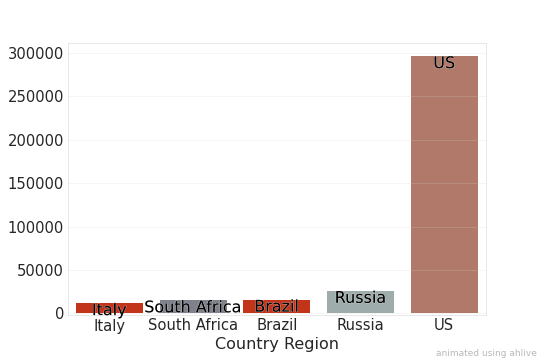

In [3]:
ah_df = ah.DataFrame(
    df_new, 'country_region', 'new_cases', label='country_region',
    chart='bar', preset='race'
)
ah_df.render()

### add labels

Not too shabby for a test run, but we can make a some improvements.

1. Scale the `new_cases` by 1000 to be more intuitive and update `ylabel`.

2. Use `barh` instead of `bar`.

3. Set `ylims='explore'` to lessen crowding of `bar_label`.

4. Add `state_labels` to show the `date`.

5. Add `inline_labels` to show the `cases`.

6. Add `title` to highlight the data shown is a 7-day rolling mean.

7. Add a `note` to cite the data.

8. Increase `figsize` to prevent left side from being cut-off.

9. Add "k" suffix to `inline_label` through `config`.

[########################################] | 100% Completed |  1.6s



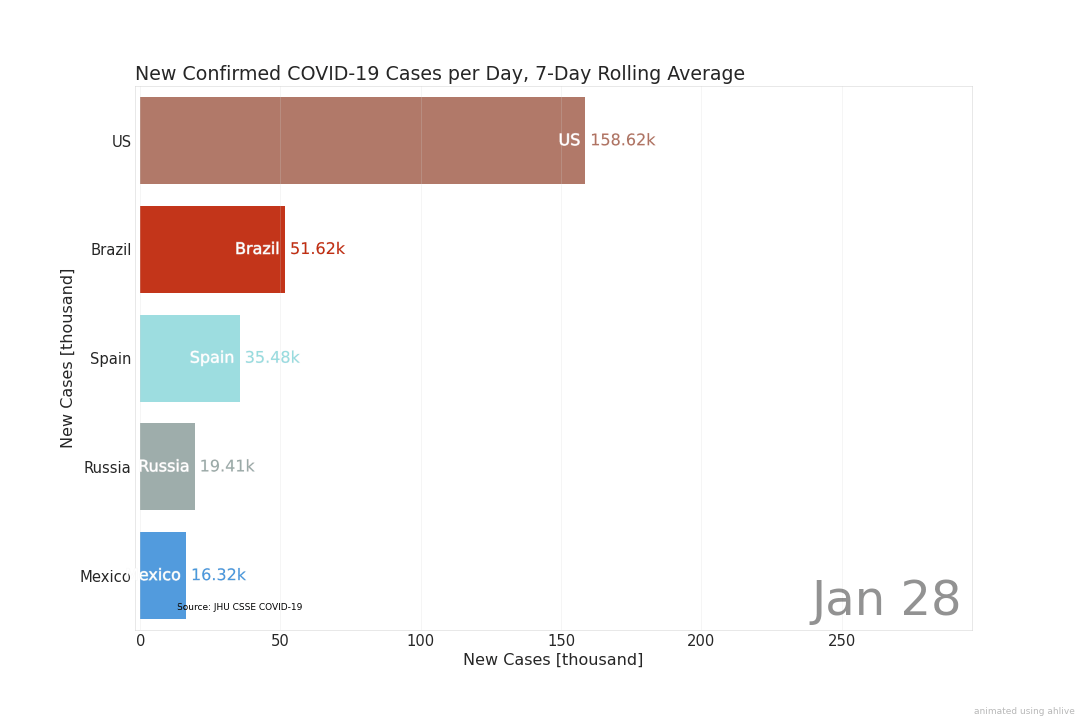

In [4]:
df_scale = df_new.copy()
df_scale['new_cases'] /= 1000

ah_df = ah.DataFrame(
    df_scale, 'country_region', 'new_cases', label='country_region',
    chart='barh', preset='race', ylabel='New Cases [thousand]',
    ylims='explore', state_labels='date', inline_labels='new_cases',
    title='New Confirmed COVID-19 Cases per Day, 7-Day Rolling Average',
    note='Source: JHU CSSE COVID-19', figsize=(15, 10),
    scheduler='processes', workers=4, animate='tail',
).config('inline', suffix='k').config("preset_inline", color="white")
ah_df.render()

<div class="alert alert-warning">

The bars' labels are jumping around instantaneously here. `frames` can be set to a higher number to show a proper animation, but for the sake of this tutorials' filesize, it will be left until the end.

</div>

### tweak further

We can normalize by population (per 100k) as well.

In [5]:
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_scale.merge(df_pop, left_on='country_region', right_on='combined_key')
df_norm['new_cases'] = df_norm['new_cases'] * 1000 / df_norm['population']
df_norm['new_cases'] *= 1e5

COVID19 POPULATION | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19


And also increase the number of bars shown with `limit` and fix `xlim0s=0`.

[########################################] | 100% Completed |  1.9s



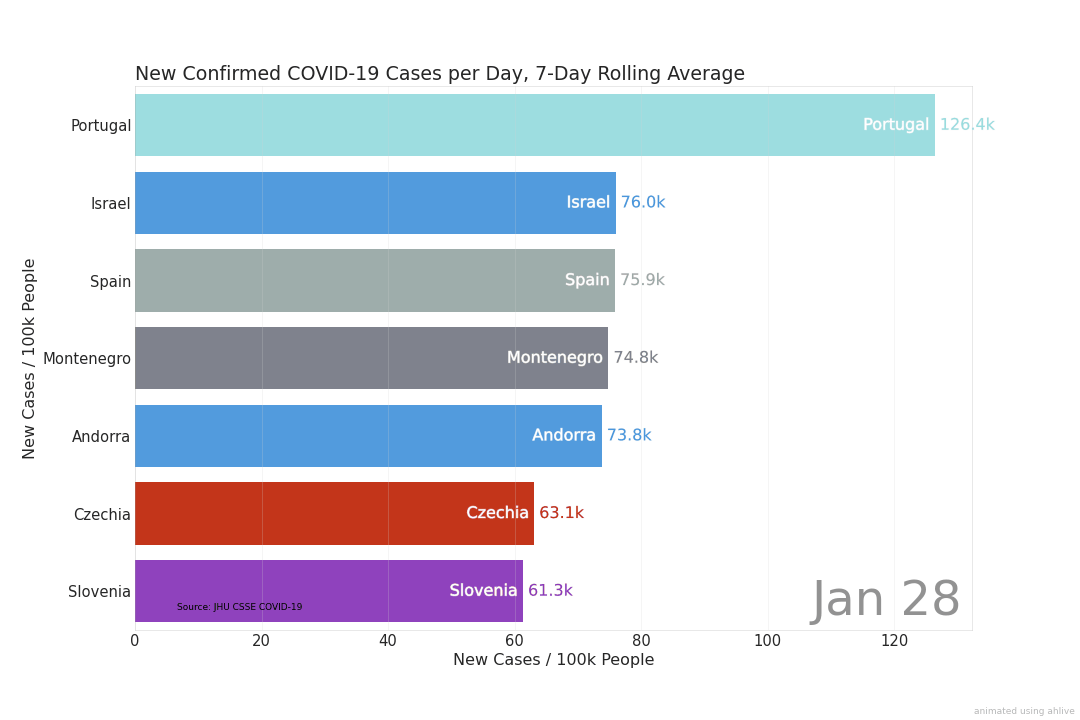

In [6]:
ah_df = ah.DataFrame(
    df_norm, 'country_region', 'new_cases', label='country_region',
    chart='barh', preset='race', ylabel='New Cases / 100k People',
    ylims='explore', state_labels='date', inline_labels='new_cases',
    title='New Confirmed COVID-19 Cases per Day, 7-Day Rolling Average',
    note='Source: JHU CSSE COVID-19', figsize=(15, 10), xlim0s=0,
    scheduler='processes', workers=4, animate='tail'
).config('inline', suffix='k').config("preset_inline", color="white").config('preset', limit=7)
ah_df.render()

We can fix the length of the `country_region` labels and manually edit the finalized `xr.Dataset`, hiding `bar_label` where values are less than 10.

[########################################] | 100% Completed |  2.1s



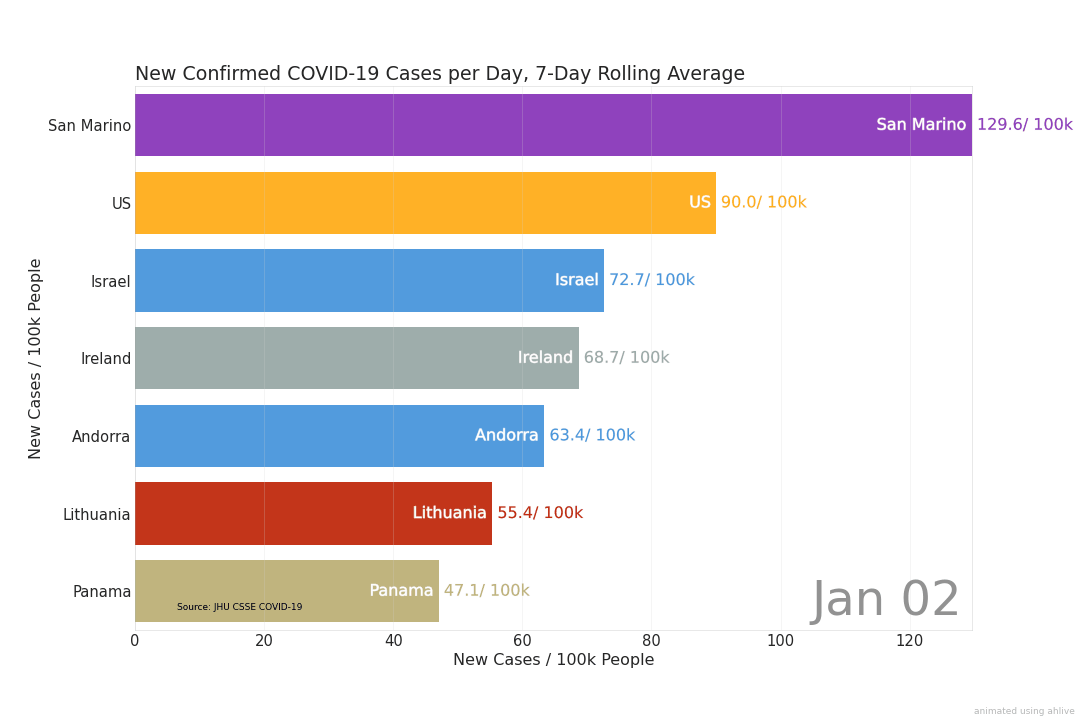

In [7]:
df_short = df_norm.copy()
df_short['country_region'] = df_short['country_region'].str[:20]

ah_df = ah.DataFrame(
    df_short, 'country_region', 'new_cases', label='country_region',
    chart='barh', preset='race', ylabel='New Cases / 100k People',
    ylims='explore', state_labels='date', inline_labels='new_cases',
    title='New Confirmed COVID-19 Cases per Day, 7-Day Rolling Average',
    note='Source: JHU CSSE COVID-19', figsize=(15, 10), xlim0s=0,
    scheduler='processes', workers=4, animate='test'
).config('inline', suffix='/ 100k').config("preset_inline", color="white").config('preset', limit=7)
ah_df = ah_df.finalize()
ds = ah_df.data[1, 1]
ds['bar_label'] = ds['bar_label'].where(ds['y'] > 10, '')
ah_df.data[1, 1] = ds
ah_df.render()

### final animation

Looks good; can do a full animation by removing the `animate` keyword.

[########################################] | 100% Completed |  1min  6.9s



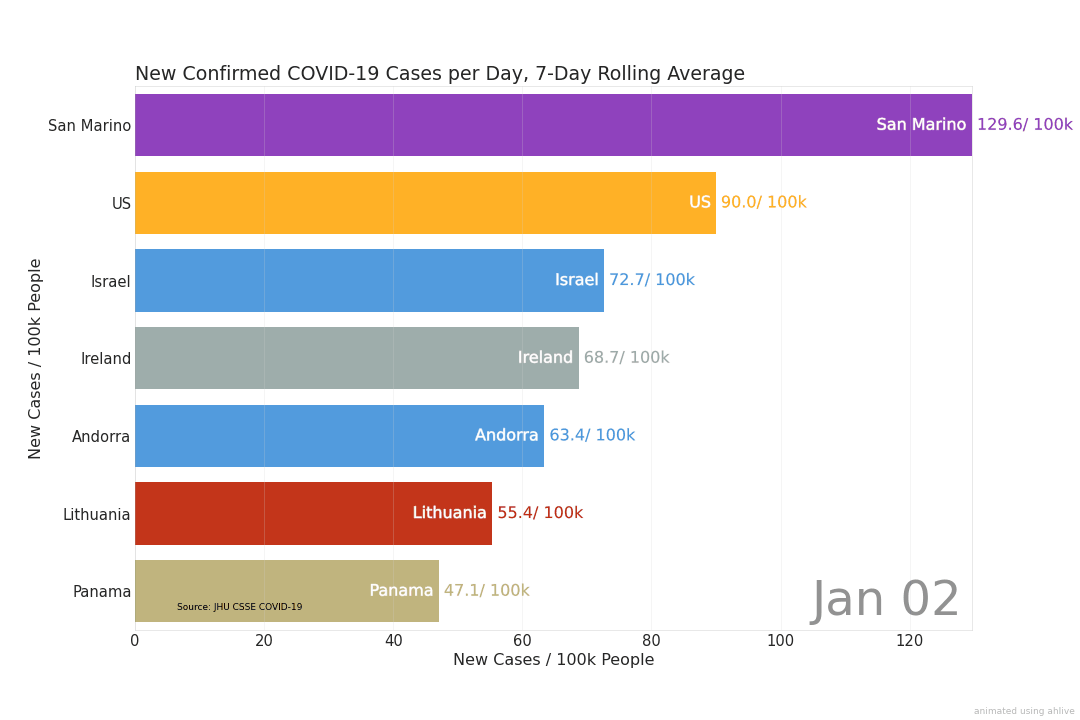

In [8]:
ah_df = ah.DataFrame(
    df_short, 'country_region', 'new_cases', label='country_region',
    chart='barh', preset='race', ylabel='New Cases / 100k People',
    ylims='explore', state_labels='date', inline_labels='new_cases',
    title='New Confirmed COVID-19 Cases per Day, 7-Day Rolling Average',
    note='Source: JHU CSSE COVID-19', figsize=(15, 10), xlim0s=0,
    frames=10, fps=25, scheduler='processes', workers=4
).config('inline', suffix='/ 100k').config("preset_inline", color="white").config('preset', limit=7)

ah_df = ah_df.finalize()
ds = ah_df.data[1, 1]
ds['bar_label'] = ds['bar_label'].where(ds['y'] > 10, '')
ah_df.data[1, 1] = ds
ah_df.render()

That's about it for this tutorial. See the next tutorial to see how to create a geographic map!

### full code

```python
import ahlive as ah
import pandas as pd

# load dataset
df = ah.tutorial.open_dataset('covid19_global_cases')
df = df.loc[
    (df['date'] >= '2021-01-01') &
    (df['date'] < '2021-02-01')
]

# compute new cases per day
df_diff = df.pivot_table(
    'cases', columns='country_region', index='date'
).diff()
df_roll = df_diff.rolling('7D').mean().dropna().astype(int)
df_new = df_roll.dropna().reset_index().melt(
    'date', value_name='new_cases'
).sort_values('date')

# scale by a 1000
df_scale = df_new.copy()
df_scale['new_cases'] /= 1000

# normalize by population
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_scale.merge(df_pop, left_on='country_region', right_on='combined_key')
df_norm['new_cases'] = df_norm['new_cases'] * 1000 / df_norm['population']
df_norm['new_cases'] *= 1e5

# shorten labels
df_short = df_norm.copy()
df_short['country_region'] = df_short['country_region'].str[:20]

# serialize
ah_df = ah.DataFrame(
    df_short, 'country_region', 'new_cases', label='country_region',
    chart='barh', preset='race', ylabel='New Cases / 100k People',
    ylims='explore', state_labels='date', inline_labels='new_cases',
    title='New Confirmed COVID-19 Cases per Day, 7-Day Rolling Average',
    note='Source: JHU CSSE COVID-19', figsize=(15, 10), xlim0s=0,
    frames=10, fps=25, scheduler='processes', workers=4
).config('inline', suffix='/ 100k').config("preset_inline", color="white").config('preset', limit=7)

# postprocess; only show bar_label if y > 10
ah_df = ah_df.finalize()
ds = ah_df.data[1, 1]
ds['bar_label'] = ds['bar_label'].where(ds['y'] > 10, '')
ah_df.data[1, 1] = ds

ah_df.render()
```